In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].uniqueque()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

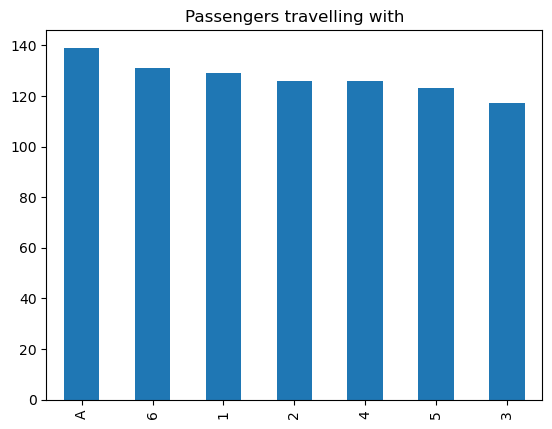

In [5]:
fig=df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [6]:
# extract  numerical part
df['number_numerical']=pd.to_numeric(df['number'],errors='coerce', downcast='integer')

In [7]:
# extract categorical part
df['number_categorical']=np.where(df['number_numerical'].isnull(), df['number'],np.nan)

In [8]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [9]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

<Axes: >

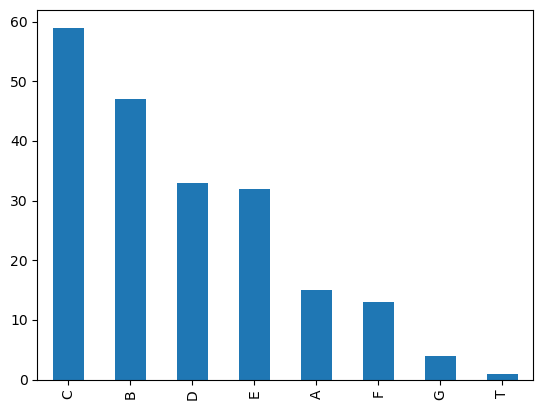

In [11]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [12]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

In [13]:
df.head(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN
